In [1]:
#HSV segmentation

In [2]:
%matplotlib inline

/Users/rolland/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [29]:
from matplotlib import pyplot as plt
from skimage import data,color,segmentation,filters, exposure,feature,io
from math import sqrt
from skimage.color import rgb2gray
import skimage.exposure as imexp
from PIL import Image
from skimage.future import graph
import numpy as np

In [4]:
#loading data

In [5]:

imgSamples = [];
imgHsvSamples = [];



for c in range(0, 4):
    imgSamples.append(np.array(Image.open('renamed-samples2/'+str(c+1)+'.bmp')))
                      
for d in range(0,4):
    imgHsvSamples.append(color.rgb2hsv(imgSamples[d]))


print(len(imgSamples))  
print(len(imgHsvSamples))    
print(imgSamples[0].shape);
print(imgHsvSamples[0].shape);

4
4
(1080, 1920, 3)
(1080, 1920, 3)


In [6]:
#plotting

In [7]:
##saturation thresholding

In [8]:
def satThreshold(v,s):    ##return hue or intensity as dominant feature
    th = 1.0 - 0.8*v;
    if(s>th):
        return "h"
    else: 
        return "v"
    

In [9]:
def approximate(img):
    tmpImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dominantVal = satThreshold(img[i,j,2],img[i,j,1])
#             print("dominantVal----"+dominantVal)
            tmpImg[i,j,:] = img[i,j,:]
            if dominantVal == "h":
                tmpImg[i,j,0] = img[i,j,0]
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = 1.0
                
            else:
                tmpImg[i,j,0] = 1.0
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = img[i,j,2]
        
    return tmpImg

In [10]:
##ploating online samples

In [11]:
##extrac main component

In [12]:
def extractMainComp(approx_img):
    #0.12 green , #0.67 blue , #0,1 red
      return ( (approx_img[:,:,0] < 0.3))

In [13]:
##renyi antropy

In [14]:
def extractMainHsvComp(approx_img,hsv_img):
    
    tmpImg = np.zeros(hsv_img.shape)
    for i in range(hsv_img.shape[0]):
        for j in range(hsv_img.shape[1]):
            tmpImg[i,j,:] = hsv_img[i,j,:]
            if  not approx_img[i,j]: #turn to black
                tmpImg[i,j,0] = 0.
                tmpImg[i,j,1] = 0.
                tmpImg[i,j,2] = 0.      
        
    return tmpImg

In [15]:
##extract main hsv component based on approximated image result

In [16]:
##extract main comp for local image

In [17]:
##histogram of approximated hvs

In [23]:
# colnum = 3
# # rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
# rownum = len(imgSamples)
# print(rownum)

# fig, axes = plt.subplots(rownum, colnum, figsize=(50, rownum*8), sharex=True, sharey=True)
# ax = axes.ravel()
# index = 0


# for i in range(0, len(imgHsvSamples)):
#     tmpimg = approximate(imgHsvSamples[i])
#     for k in range(0,3):
#         ax_hist = ax[index+k]
#         ax_hist.hist(tmpimg[:,:,k].ravel())
#         ax_hist.set_title("histo "+str(i)+"-"+str(k))
#         ax_hist.axis('on')
#         ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
        
#     index +=3
    
# plt.show()


In [19]:
def extractMainComp2(approx_img):
    extractedImg = ((approx_img[:,:,0] < 0.1))
    return extractedImg

In [20]:
def extractHueComp(approx_img):
    extractedImg = approx_img[:,:,0]
    return extractedImg

In [21]:
def extractIntensityComp(approx_img):
    extractedImg = approx_img[:,:,2]
    return extractedImg

4


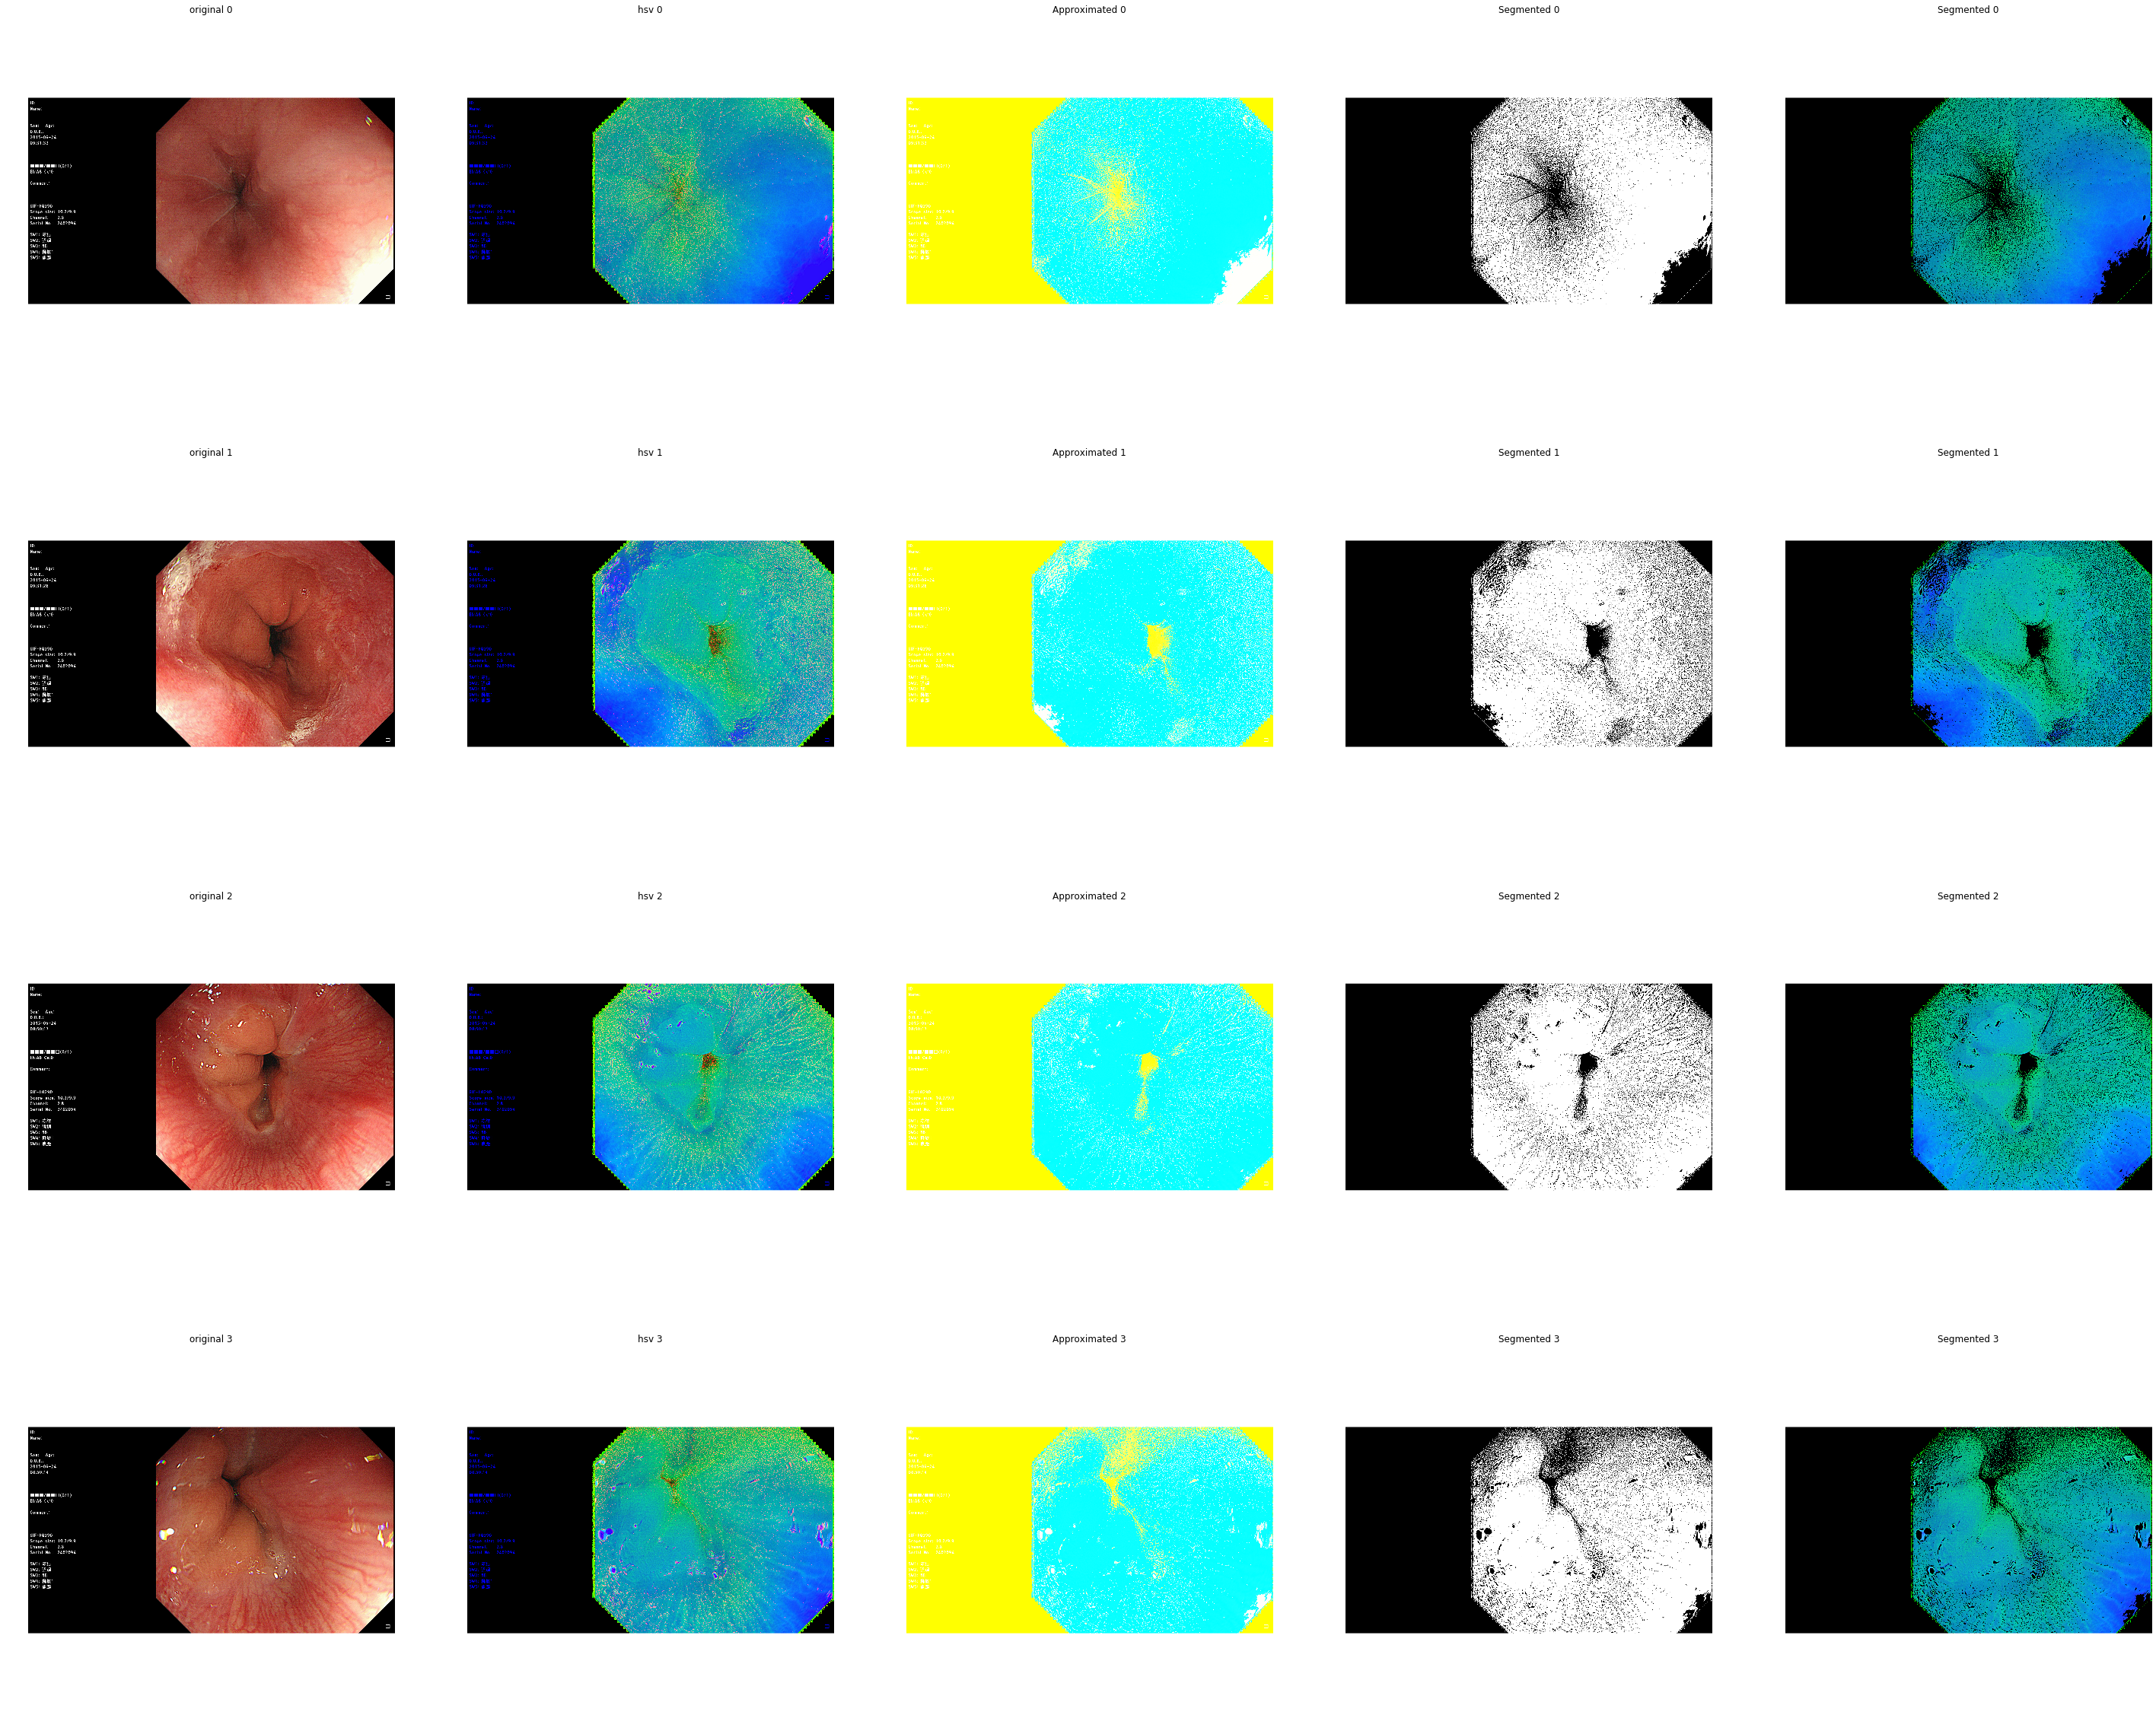

In [22]:
colnum = 5
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(imgSamples)
print(rownum)


fig, axes = plt.subplots(rownum, colnum, figsize=(50, rownum*10), sharex=True, sharey=True)
ax = axes.ravel()
index = 0


for i in range(0, len(imgHsvSamples)):
    
    ax[index].imshow(imgSamples[i],cmap='gray')
    ax[index].set_title("original "+str(i))
    ax[index].axis('off') 
    
    ax[index+1].imshow(imgHsvSamples[i],cmap='gray')
    ax[index+1].set_title("hsv "+str(i))
    ax[index+1].axis('off') 
    
    ax[index+2].imshow(approximate(imgHsvSamples[i]),cmap='gray')
    ax[index+2].set_title("Approximated "+str(i))
    ax[index+2].axis('off') 
    
    
    ax[index+3].imshow(extractMainComp(approximate(imgHsvSamples[i])),cmap='gray')
    ax[index+3].set_title("Segmented "+str(i))
    ax[index+3].axis('off')
    

    approximatedSeg = extractMainComp(approximate(imgHsvSamples[i]))
    hsvSegmented = extractMainHsvComp(approximatedSeg,imgHsvSamples[i])
    ax[index+4].imshow(hsvSegmented,cmap='gray')
    ax[index+4].set_title("Segmented "+str(i))
    ax[index+4].axis('off') 
    
    index +=5
    
plt.show()

In [34]:
#histogram of processed images

4
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


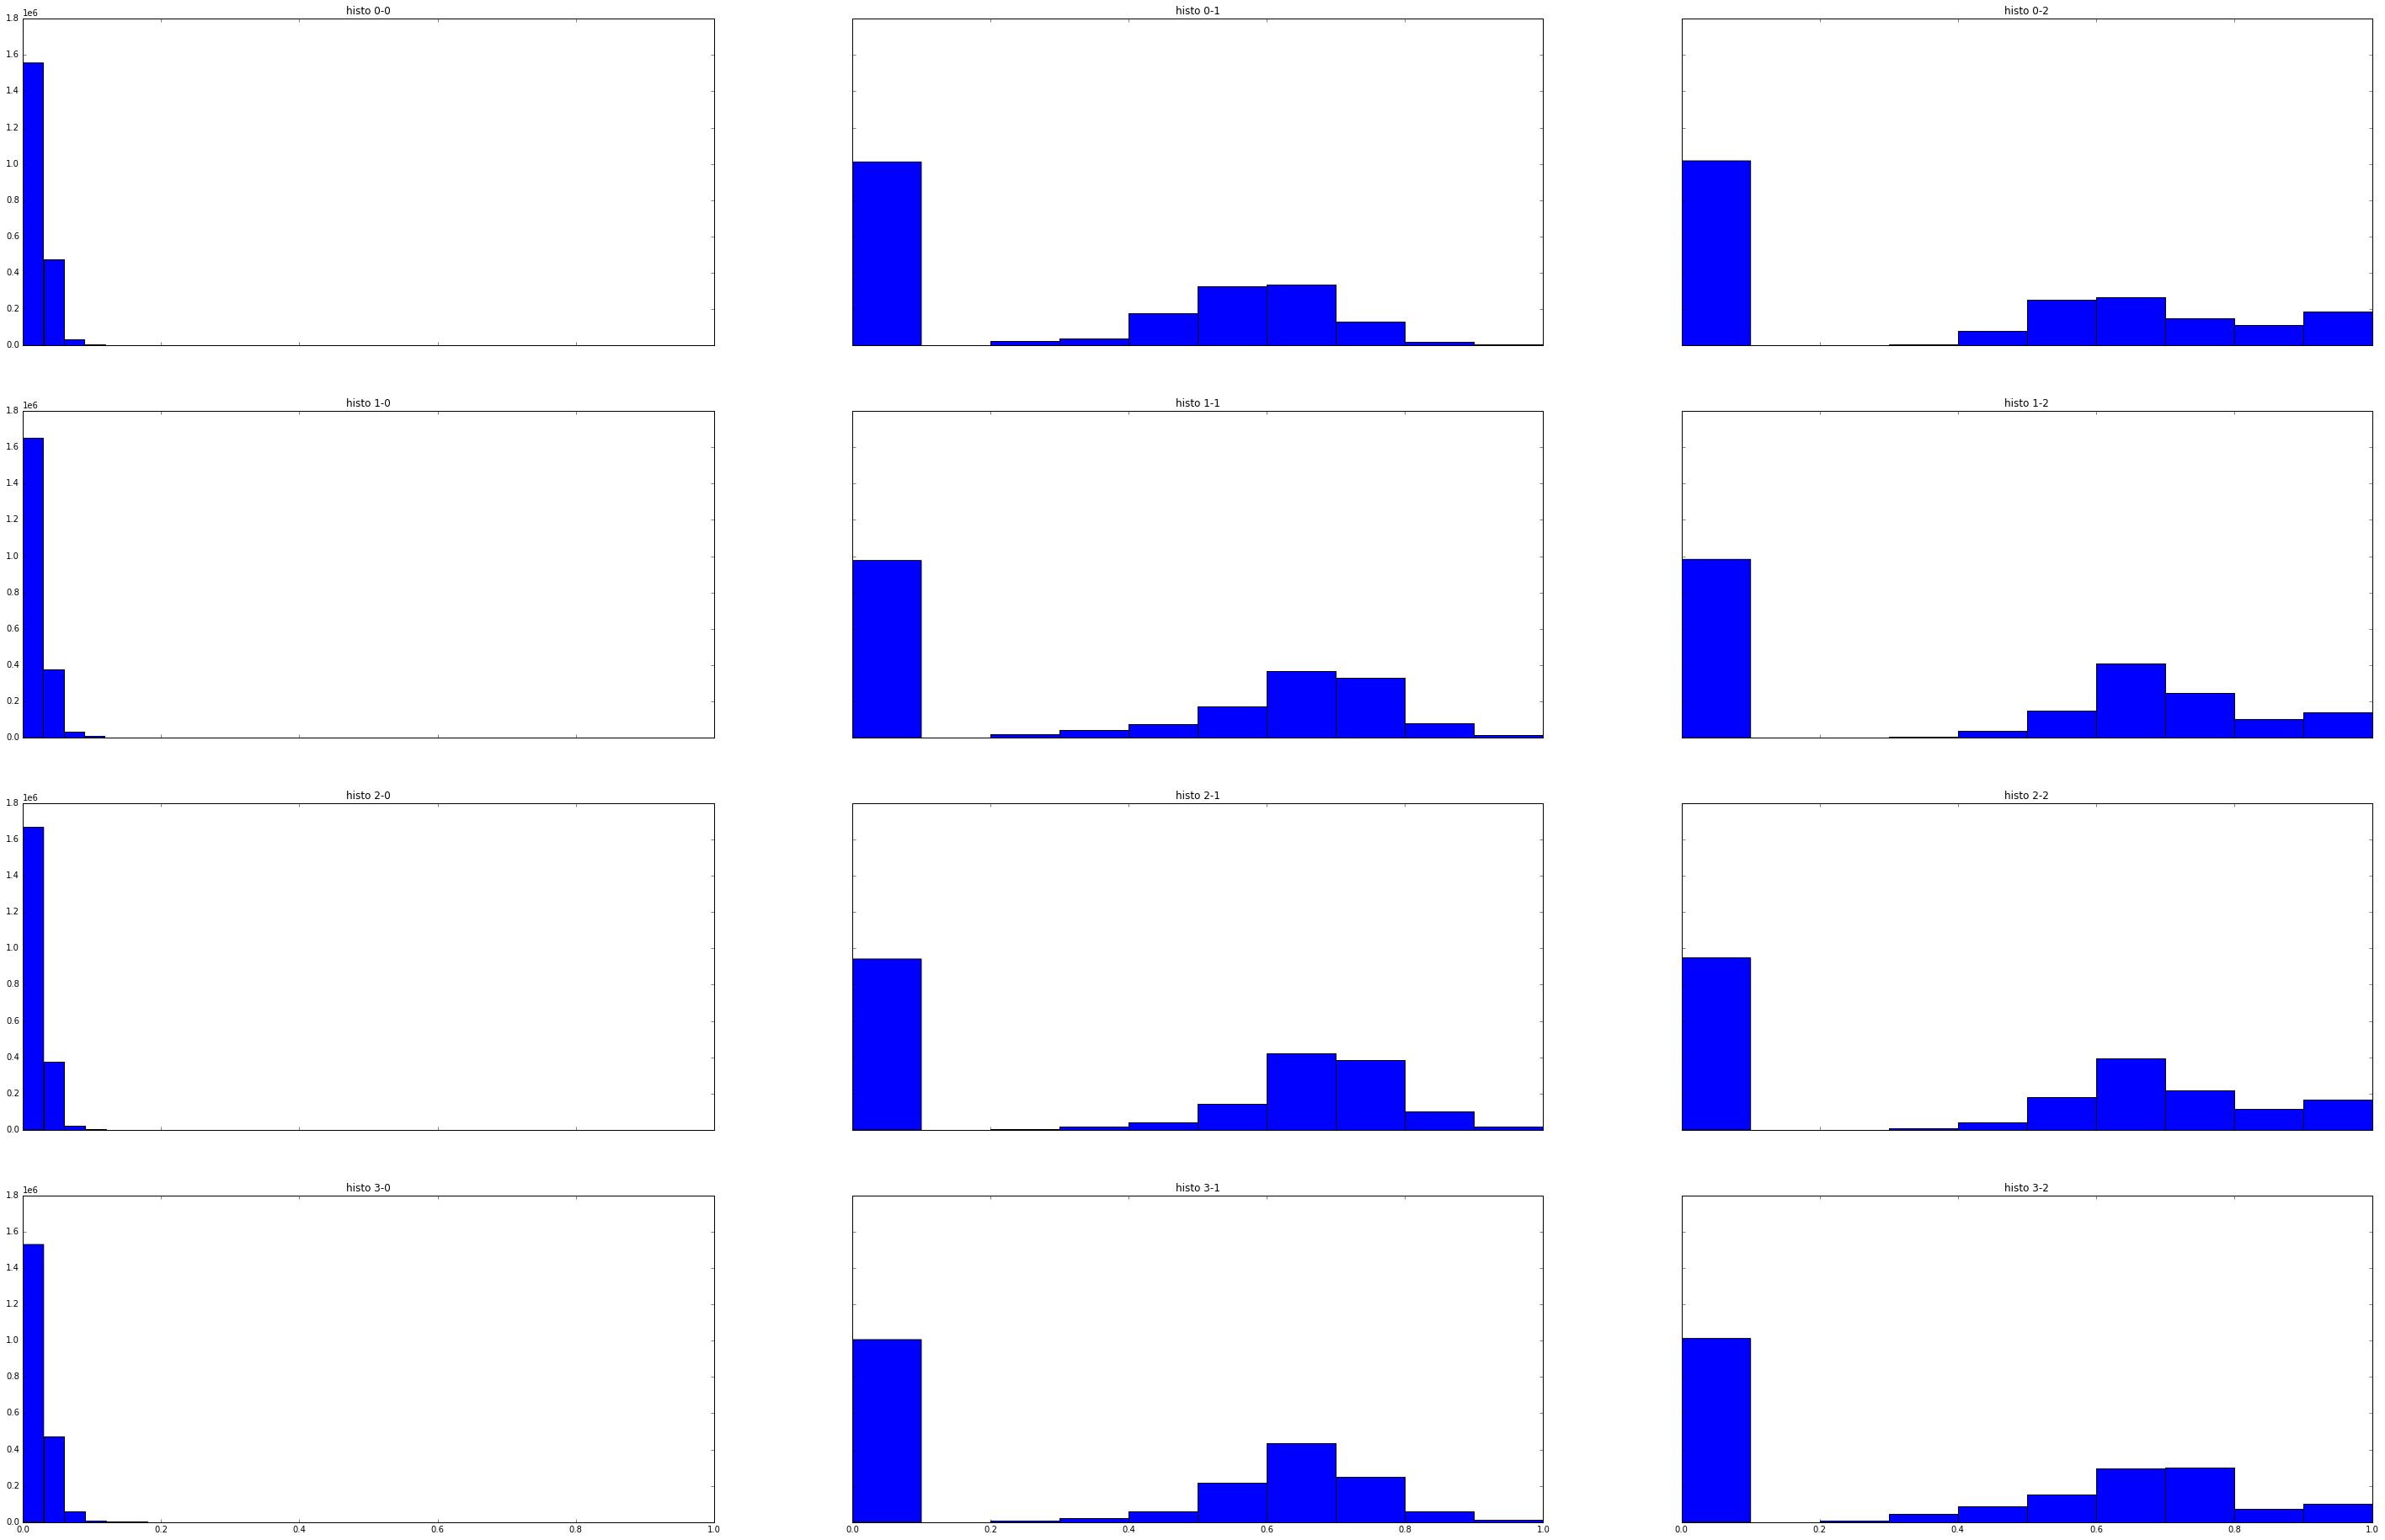

In [37]:
colnum = 3
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(imgSamples)
print(rownum)

fig, axes = plt.subplots(rownum, colnum, figsize=(50, rownum*8), sharex=True, sharey=True)
ax = axes.ravel()
index = 0


for i in range(0, len(imgHsvSamples)):
#     tmpimg = approximate(imgHsvSamples[i])
    
    approximatedSeg = extractMainComp(approximate(imgHsvSamples[i]))
    tmpimg = extractMainHsvComp(approximatedSeg,imgHsvSamples[i])
    print(tmpimg.shape)
    for k in range(0,3):
        ax_hist = ax[index+k]
        ax_hist.hist(tmpimg[:,:,k].ravel())
        ax_hist.set_title("histo "+str(i)+"-"+str(k))
        ax_hist.axis('on')
        ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
        
    index +=3
    
plt.show()

In [4]:
# from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
# brick = img_as_float(data.load('brick.png'))[shrink]
# grass = img_as_float(data.load('grass.png'))[shrink]
# wall = img_as_float(data.load('rough-wall.png'))[shrink]
brick = img_as_float(data.load('renamed-samples2/1.bmp'))[shrink]
grass = img_as_float(data.load('renamed-samples2/2.bmp'))[shrink]
wall = img_as_float(data.load('renamed-samples2/3.bmp'))[shrink]

image_names = ('brick', 'grass', 'wall')
images = (brick, grass, wall)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(wall, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(ndi.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: brick
original: brick, rotated: 70deg, match result: brick
original: grass, rotated: 145deg, match result: grass
